# Выбор локации для скважины

# Choice of location for the well

Допустим, вы работаете в нефтедобывающей компании. Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

________________________________________________________________________________________________________________________________

Let's say you work for an oil company. We need to decide where to drill a new well.

You have been provided with oil samples in three regions: in each of 10,000 fields, where the quality of oil and the volume of its reserves have been measured. Build a machine learning model to help determine the region where mining will bring the most profit. Analyze possible profits and risks using the *Bootstrap.* technique

Steps to choose a location:

- In the selected region, they are looking for deposits, for each, the values of the signs are determined;
- Build a model and estimate the volume of reserves;
- Select the deposits with the highest value estimates. The number of fields depends on the company's budget and the cost of developing one well;
- The profit is equal to the total profit of the selected deposits.

## Загрузка и подготовка данных

## Loading and preparing data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

Загрузим каждый регион в отдельный датафрейм

Load each region into a separate dataframe

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [3]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [11]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Проверяем данные на предмет наличия нулевых значений и пропусков

Checking data for nulls and gaps

In [13]:
geo_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [14]:
geo_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [15]:
geo_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [19]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось')

пропусков не осталось


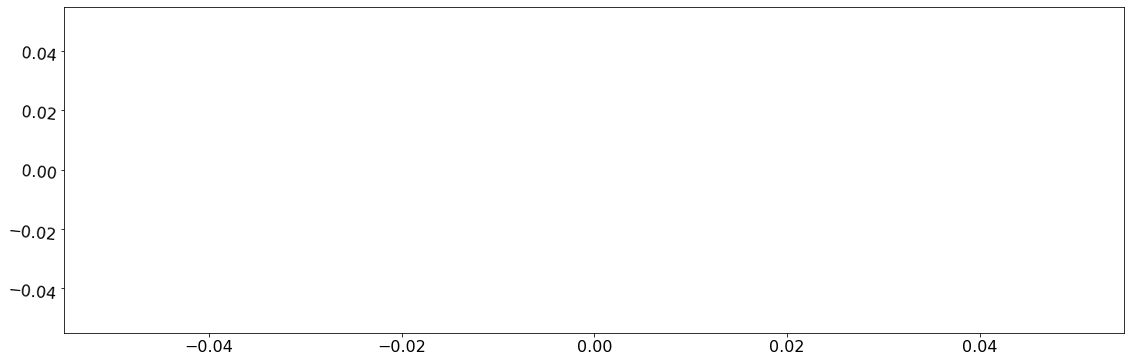

In [20]:
pass_value_barh(geo_data_0)

пропусков не осталось


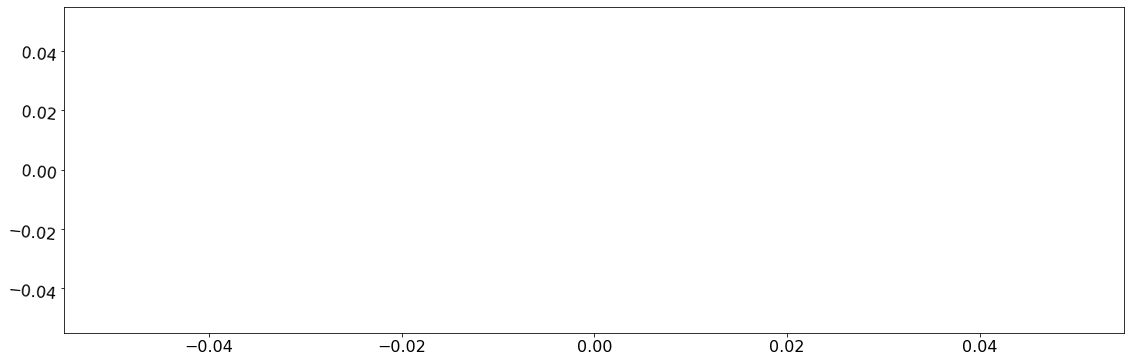

In [21]:
pass_value_barh(geo_data_1)

пропусков не осталось


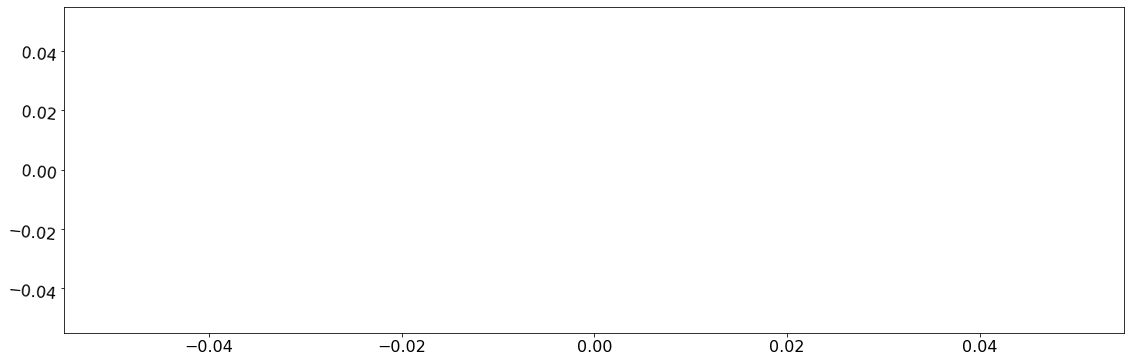

In [22]:
pass_value_barh(geo_data_2)

In [28]:
def check_columns(data_frame):
    for col in data_frame.select_dtypes(include='object').columns:
        print('Уникальные значения столбца', col)
        print(data_frame[col].unique(), '\n')
        
check_columns(geo_data_0)
check_columns(geo_data_1)
check_columns(geo_data_2)

Уникальные значения столбца id
['txEyH' '2acmU' '409Wp' ... '3rnvd' '7kl59' '1CWhH'] 

Уникальные значения столбца id
['kBEdx' '62mP7' 'vyE1P' ... '09gWa' 'rqwUm' 'relB0'] 

Уникальные значения столбца id
['fwXo0' 'WJtFt' 'ovLUW' ... 'tKPY3' 'nmxp2' 'V9kWn'] 



Удалим из каждого датафрейма столбец id. Он не несет значимости для для изучаемой модели.

Let's remove the id column from each dataframe. It is not significant for the model being studied.

In [19]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

Изучим гистограммы по целевому признаку - столбцу product.

Let's study the histograms by the target attribute - the product column.

In [61]:
def oil_hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])

    plt.hist(seria, bins=bins)
    plt.grid(True)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")

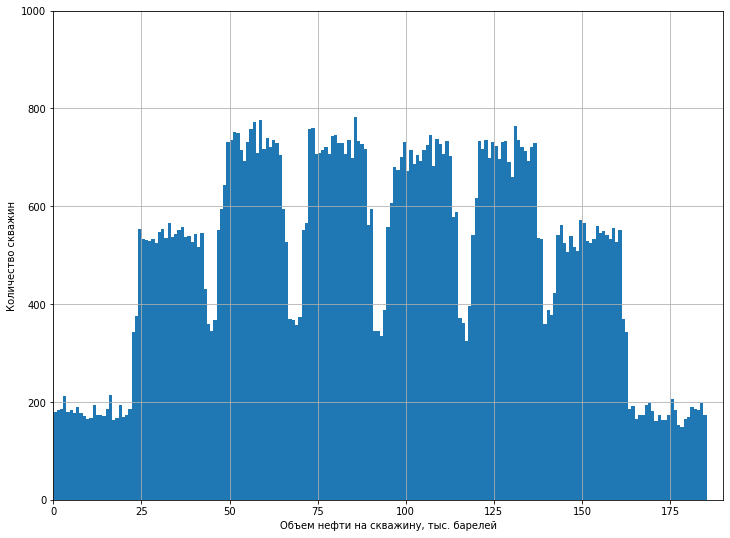

In [37]:
oil_hist(geo_data_0['product'], 200, 190, 1000)

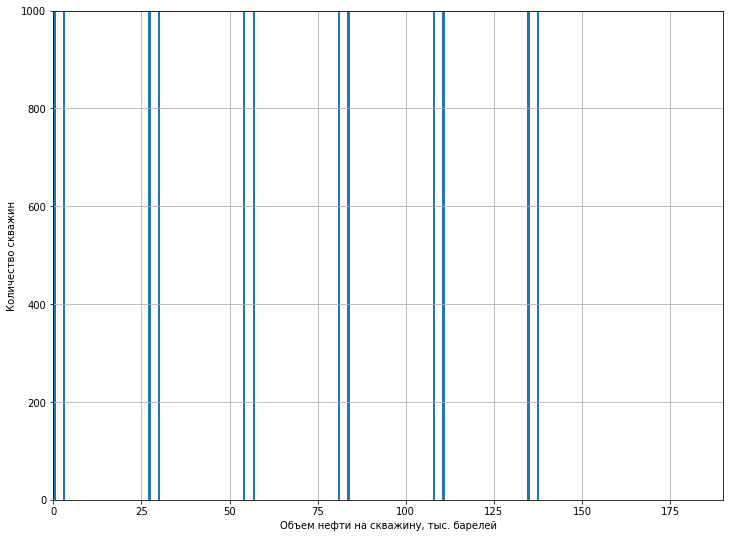

In [43]:
oil_hist(geo_data_1['product'], 200, 190, 1000)

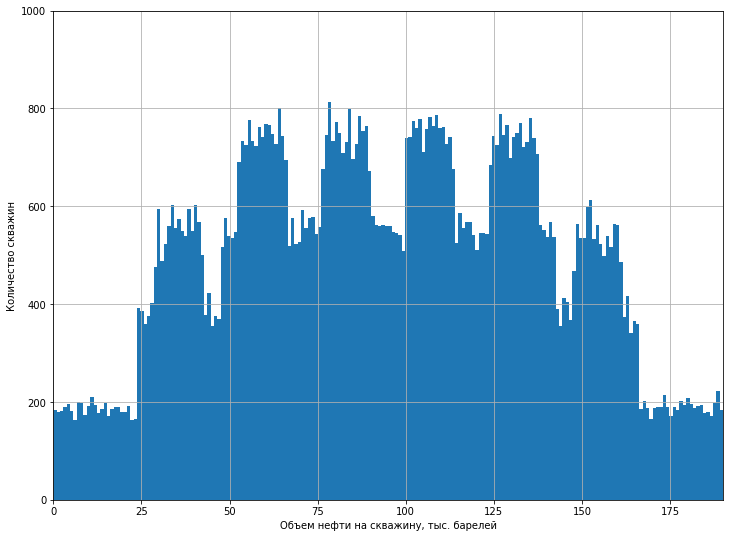

In [39]:
oil_hist(geo_data_2['product'], 200, 190, 1000)

### Выводы по первому этапу

### Conclusions on the first stage

Данные проверены и готовы к обучению.

Во втором месторождении около 8,2% месторождений не имело значения в столбце product. При сравнении с такими же значениями из первого и третьего региона можно понять, что были утеряны данные или не было исследовано количество барелей нефти.

По гистограммам можно понять, что у первого и третьего региона наспределение скважин близкое к нормальному. Во втором регионе данные имеют странное распределение: от 0 до 5 баррелей с шагом по 15-20 равномерно распределены 100000 значений. Данные не подчиняются закону больших чисел и скорей всего были введены искуственно.

________________________________________________________________________________________________________________________________

The data is verified and ready for training.

In the second deposit, about 8.2% of the deposits had no value in the product column. When compared with the same values from the first and third region, it can be understood that data was lost or the number of barrels of oil was not examined.

According to the histograms, one can understand that the distribution of wells in the first and third regions is close to normal. In the second region, the data has a strange distribution: from 0 to 5 barrels in steps of 15-20, 100,000 values are evenly distributed. The data does not obey the law of large numbers and was most likely introduced artificially.

## Обучение и проверка модели

## Train and validate the model

Выполняем разбивку датафрейма.

We perform the breakdown of the dataframe.

In [20]:
def test_split(df, target):
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=20222022)
    
    return features_train, features_valid, target_train, target_valid

In [21]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = test_split(geo_data_0, 'product')

In [22]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(geo_data_1, 'product')

In [23]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(geo_data_2, 'product')

Обучаем модели и анализируем метрику RMSE.

We train models and analyze the RMSE metric.

In [24]:
model = LinearRegression()

In [25]:
model.fit(features_train_0, target_train_0)
predicted_target_0 = model.predict(features_valid_0)
print('RMSE -', mean_squared_error(target_valid_0, predicted_target_0)**0.5)

RMSE - 37.76975339407468


In [26]:
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE -', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

RMSE - 0.8923363210278951


In [27]:
model.fit(features_train_2, target_train_2)
predicted_target_2 = model.predict(features_valid_2)
print('RMSE -', mean_squared_error(target_valid_2, predicted_target_2)**0.5)

RMSE - 40.00481199355259


Изменение стандартных значений гиперпараметров не улучшило модель. Произведем вывод предсказанного запаса с реальным и выведем RMSE.

Changing the default hyperparameter values did not improve the model. Let's output the predicted stock with the real one and output RMSE.

In [28]:
model = LinearRegression()

def oil_predict(df, target_name):
    features = df.drop([target_name] , axis=1)
    target = df[target_name]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=202220222)
    
    model.fit(features_train, target_train)
    predicted_target = model.predict(features_valid)
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target         
    }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    mean = data_frame['predicted_product'].mean()
    oil_sum = data_frame['predicted_product'].sum()
    return data_frame, rmse, mean, oil_sum

In [31]:
geo_data_0_predicted, geo_data_0_rmse, geo_data_0_predicted_mean, geo_data_0_predicted_sum = oil_predict(geo_data_0, 'product')
print(geo_data_0_predicted.head())
print('RMSE -', geo_data_0_rmse)
print('Средний запас запасанного сырья -', geo_data_0_predicted_mean)

       real_product  predicted_product
60547    130.662078          91.535586
41038     99.295243          97.998486
19714    126.626532          83.666172
39258    133.245392         104.377537
97611     82.087083          99.531431
RMSE - 37.70836100791255
Средний запас запасанного сырья - 92.6539607275999


In [32]:
geo_data_1_predicted, geo_data_1_rmse, geo_data_1_predicted_mean, geo_data_1_predicted_sum = oil_predict(geo_data_1, 'product')
print(geo_data_1_predicted.head())
print('RMSE -', geo_data_1_rmse)
print('Средний запас запасанного сырья -', geo_data_1_predicted_mean)

       real_product  predicted_product
60547     26.953261          28.011541
41038     80.859783          81.362351
19714     30.132364          28.379624
39258    110.992147         110.390774
97611    110.992147         110.151580
RMSE - 0.8906297528935063
Средний запас запасанного сырья - 68.50864126539348


In [33]:
geo_data_2_predicted, geo_data_2_rmse, geo_data_2_predicted_mean, geo_data_2_predicted_sum = oil_predict(geo_data_2, 'product')
print(geo_data_2_predicted.head())
print('RMSE -', geo_data_2_rmse)
print('Средний запас запасанного сырья -', geo_data_2_predicted_mean)

       real_product  predicted_product
60547     49.073641          78.181724
41038    149.573613         100.973163
19714    111.922841         113.812101
39258     37.312702          79.764822
97611     68.003253          93.774460
RMSE - 39.97587853000735
Средний запас запасанного сырья - 94.840922580819


Оценим общий запас на регион по предсказанным данным.

Let us estimate the total stock per region according to the predicted data.

In [34]:
print('Суммарный предсказанный запас в позиции 0 -', geo_data_0_predicted_sum)
print('Суммарный реальный запас в позиции 0 -', geo_data_0_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 1 -', geo_data_1_predicted_sum)
print('Суммарный реальный запас в позиции 1 -', geo_data_1_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 2 -', geo_data_2_predicted_sum)
print('Суммарный реальный запас в позиции 2 -', geo_data_2_predicted['real_product'].sum())

Суммарный предсказанный запас в позиции 0 - 2316349.0181899974
Суммарный реальный запас в позиции 0 - 2317363.976502965

Суммарный предсказанный запас в позиции 1 - 1712716.031634837
Суммарный реальный запас в позиции 1 - 1712760.7295402542

Суммарный предсказанный запас в позиции 2 - 2371023.064520475
Суммарный реальный запас в позиции 2 - 2361001.527965034


### Выводы по второму этапу

### Conclusions on the second stage

Данные предсказаний о количестве нефти по сумме примерно совпадают по сумме с предсказанными значениями. Лучше всего модель предсказала запасы во втором регионе (RMSE - 0.88), далее в первом и третьем соответственно.

Изучим все регионы на риски и прибыль.

The amount of oil prediction data is roughly the same amount as the predicted values. Best of all, the model predicted reserves in the second region (RMSE - 0.88), then in the first and third, respectively.

We will study all regions for risks and profits.

## Подготовка к расчёту прибыли

## Preparation for profit calculation

Создадим переменные об экономической информации.

Let's create variables about economic information.

In [56]:
BUDGET = 1e+07 #Мы расчитываем прибыль в тысячах рублей за тысячу барелей, поэтому 1 милиард сохранен таким образом
CHOSEN_POINTS = 500 #При разведке региона исследуются 500 точек
BEST_POINTS = 200 #200 лучших будут выбраны для разработки
PRICE_PER_BARREL = 450 #При нынешних ценах один баррель сырья приносит 450 рублей дохода

Расчитаем безубыточную разработку сырья на 200 месторождениях. И найдем среднее количество продукта в месторождениях необходимое для этого.

We calculate the break-even development of raw materials at 200 fields. And we will find the average amount of product in the deposits necessary for this.

In [57]:
average_profit_per_point = BUDGET / BEST_POINTS
print('Средняя прибыль на лучшую точку -', average_profit_per_point, 'тыс.руб.')

average_barrels_per_point = average_profit_per_point  / PRICE_PER_BARREL
print('Средний объем нефти на точку -',average_barrels_per_point, 'тыс. барелей')

average_barrels = BUDGET / PRICE_PER_BARREL
print('Средний объем нефти на регион -',average_barrels, 'тыс. барелей')

Средняя прибыль на лучшую точку - 50000.0 тыс.руб.
Средний объем нефти на точку - 111.11111111111111 тыс. барелей
Средний объем нефти на регион - 22222.222222222223 тыс. барелей


In [58]:
print('Средний запас фактичекой нефти на скважину в регионе 1', geo_data_0['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 2', geo_data_1['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 3', geo_data_2['product'].mean())

Средний запас фактичекой нефти на скважину в регионе 1 92.50000000000001
Средний запас фактичекой нефти на скважину в регионе 2 68.82500000000002
Средний запас фактичекой нефти на скважину в регионе 3 95.00000000000004


Создадим функцию для расчета прибыли на 500 разведанных точек.

Let's create a function to calculate profit for 500 explored points.

In [59]:
def oil_profit_calculation(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price_per_barrel * selected.sum() - BUDGET

Выведем распределение предсказанных значений.

Let's derive the distribution of predicted values.

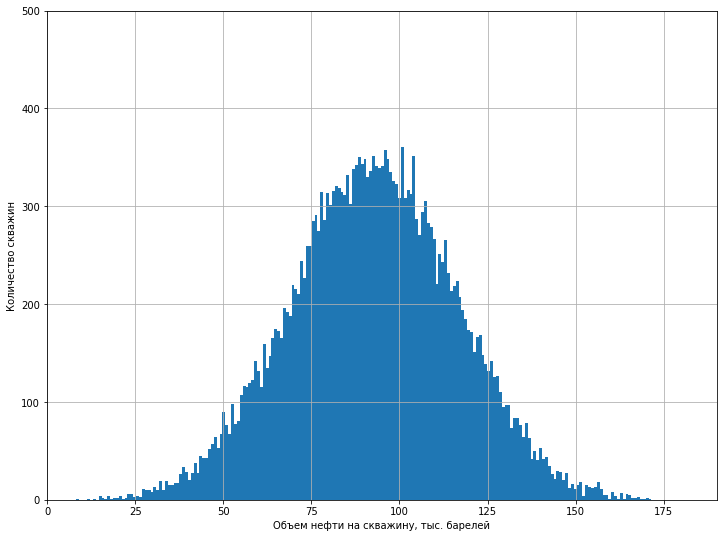

In [62]:
oil_hist(geo_data_0_predicted['predicted_product'], 200, 190, 500)

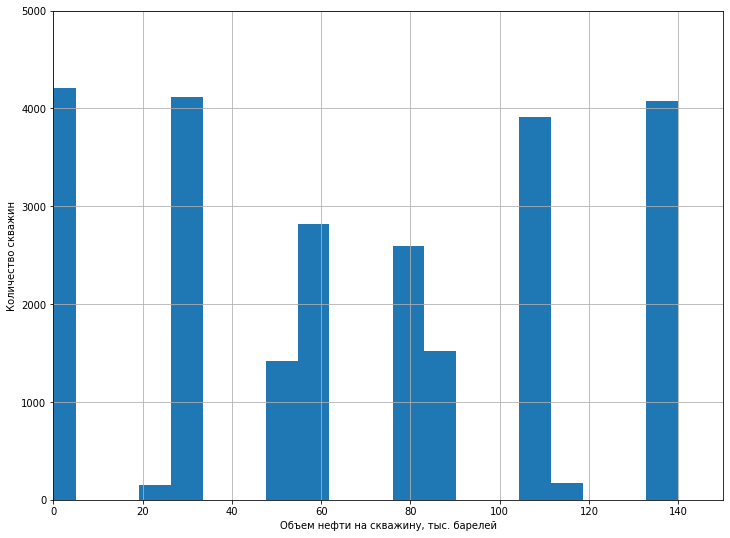

In [73]:
oil_hist(geo_data_1_predicted['predicted_product'], 20, 150, 5000)

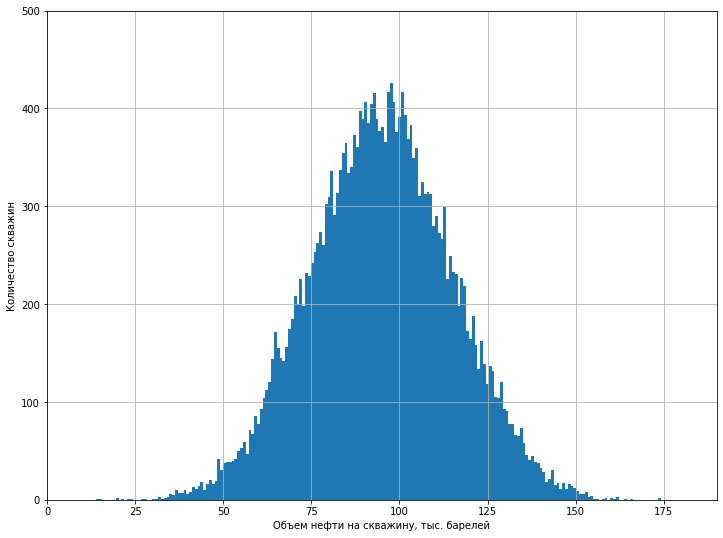

In [74]:
oil_hist(geo_data_2_predicted['predicted_product'], 200, 190, 500)

### Выводы по третьему этапу

### Conclusions on the third stage

Была подготовлена средняя оценка прибили за скважину и средний объем на скважину. И создана функция по расчету прибыли.

Анализ средних объемов на скважину для каждого региона следующий.

Изучены средние фактические запасы. Для первого и третьего - высокая вероятность окупить затраты. Разброс значений вокруг среднего 92.5 и 95 говорит нам о том, что существует достаточно много скважин, где запасы больше необходимого среднего.

Данные по второму региону показывают достаточно много значений больше 111, хотя и среднее значение 68.8, что может сделать данный регион также привлекательным, особенно с учётом точности предсказаний по региону согласно метрике RMSE.

________________________________________________________________________________________________________________________________

An average nailed estimate per well and an average volume per well were prepared. And a function was created to calculate the profit.

The analysis of average volumes per well for each region is as follows.

The average actual stocks have been studied. For the first and third - a high probability of recoupment of costs. The scatter of values around the average of 92.5 and 95 tells us that there are quite a few wells where the reserves are greater than the required average.

Data for the second region shows quite a lot of values above 111, although the average value is 68.8, which can make this region also attractive, especially given the accuracy of predictions for the region according to the RMSE metric.

## Расчёт прибыли и рисков 

## Profit and Risk Calculation

Посчитаем риски и прибыль для первого и третьего регионов с применением техники Bootstrap.

Let's calculate the risks and rewards for the first and third regions using the Bootstrap technique.

In [63]:
state = np.random.RandomState(5062020)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=chosen_points)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calculation(target, probs_sample, best_points)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average))
    print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower, upper))
    print('Процент риска {:.2%}'.format(risk))

In [64]:
print('Данные по первому региону.')

bootstrap_1000(geo_data_0_predicted['real_product'], geo_data_0_predicted['predicted_product'])

Данные по первому региону.
Средняя прибыль по региону = 426662.30 тыс.руб.
95% доверительный интервал от -105251.23 до 911299.38 тыс.руб.
Процент риска 4.60%


In [54]:
print('Данные по второму региону.')

bootstrap_1000(geo_data_1_predicted['real_product'], geo_data_1_predicted['predicted_product'])

Данные по второму региону.
Средняя прибыль по региону = 408714.89 тыс.руб.
95% доверительный интервал от 12518.62 до 834588.94 тыс.руб.
Процент риска 2.10%


In [55]:
print('Данные по третьему региону.')

bootstrap_1000(geo_data_2_predicted['real_product'], geo_data_2_predicted['predicted_product'])

Данные по третьему региону.
Средняя прибыль по региону = 322242.56 тыс.руб.
95% доверительный интервал от -223368.29 до 834663.53 тыс.руб.
Процент риска 12.80%


### Выводы по четвёртому этапу

### Conclusions on the fourth stage

Данные были обработаны и рассчитаны прибыль, интервал и риски.

Мы отсеиваем первый и третий регион, так как риски остаточно велики. Остается один единственный - второй, чей риск ниже требуемого. Кроме того доверительный интервал показывает, что даже при не очень удачном выборе разработка скважин окупится.

________________________________________________________________________________________________________________________________

The data was processed and profit, interval and risks were calculated.

We filter out the first and third regions, as the risks are still high. Only one remains - the second, whose risk is lower than required. In addition, the confidence interval shows that even with a not very good choice, well development will pay off.

## Итоговый вывод

## Final output

При выполнении данного проекта были выполнены следующие этапы:

- Изучины данные. Проведена подготовка данных к моделированию.
- Обучена модель для каждого региона geo_data_0, geo_data_1 и geo_data_2.
- Составлена функция расчета прибыли в регионе.
- Посчитана прибыль и риски за каждый регион и обоснован выбор региона.

Второй регион получился одним из лучших по показателям предсказывания, хотя данные не выглядят нормально распределенными. Рекомендуется обратиться к заказчику по поводу перепроверки выданных данных.

________________________________________________________________________________________________________________________________

During the implementation of this project, the following steps were carried out:

- Learn the data. Data preparation for modeling was carried out.
- A model was trained for each region geo_data_0, geo_data_1 and geo_data_2.
- Compiled a function for calculating profits in the region.
- The profit and risks for each region were calculated and the choice of the region was justified.

The second region turned out to be one of the best in terms of predictive performance, although the data does not look normally distributed. It is recommended to contact the customer about rechecking the issued data.